# **PRÁCTICA 2:  Machine Learning - Parte 1: Análisis en Componentes Principales (PCA)**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 3ª curso del Grado Ciencia de Datos

**INTRO:**
Vale la pena mirar el siguiente link para entender el PCA

https://setosa.io/ev/principal-component-analysis/

## 1. PCA "a mano"

Cargamos librerias


In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Descargamos los datos de los datasets de sklearn

In [ ]:
iris = datasets.load_iris()
X = iris.data

In [ ]:
X.shape

(150, 4)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbabef02150>,
 Text(0.5, 1.0, 'Dimensiones 3 y 4'))

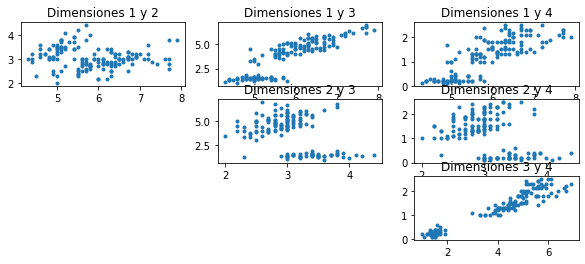

In [ ]:
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(10,4))
plt.subplot(3,3,1), plt.plot(X[:,0],X[:,1],'.'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,2), plt.plot(X[:,0],X[:,2],'.'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,3), plt.plot(X[:,0],X[:,3],'.'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,5), plt.plot(X[:,1],X[:,2],'.'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,6), plt.plot(X[:,1],X[:,3],'.'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,9), plt.plot(X[:,2],X[:,3],'.'), plt.title('Dimensiones 3 y 4')

### Aplicamos PCA

#### Restamos la media

In [ ]:
m = np.mean(X, axis = 0)
Xm = X - m[np.newaxis,:]

In [ ]:
# esta es la media
m

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbabf2c9490>,
 Text(0.5, 1.0, 'Dimensiones 3 y 4'))

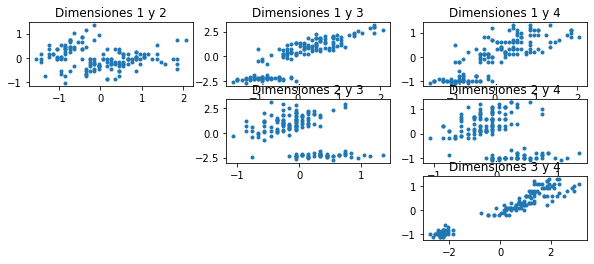

In [ ]:
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(10,4))
plt.subplot(3,3,1), plt.plot(Xm[:,0],Xm[:,1],'.'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,2), plt.plot(Xm[:,0],Xm[:,2],'.'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,3), plt.plot(Xm[:,0],Xm[:,3],'.'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,5), plt.plot(Xm[:,1],Xm[:,2],'.'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,6), plt.plot(Xm[:,1],Xm[:,3],'.'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,9), plt.plot(Xm[:,2],Xm[:,3],'.'), plt.title('Dimensiones 3 y 4')

#### Calculamos la matriz de covarianza

In [ ]:
cov_matrix = np.dot(Xm.T, Xm) / Xm.shape[0]

In [ ]:
# Esta es la matriz de covarianza
cov_matrix

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

#### Obtenemos los autovalores y autovectores de la matriz de covarianza

In [ ]:
evals, evecs = np.linalg.eigh(cov_matrix)

In [ ]:
# Autovectores
evecs

array([[ 0.31548719,  0.58202985,  0.65658877, -0.36138659],
       [-0.3197231 , -0.59791083,  0.73016143,  0.08452251],
       [-0.47983899, -0.07623608, -0.17337266, -0.85667061],
       [ 0.75365743, -0.54583143, -0.07548102, -0.3582892 ]])

In [ ]:
# Autovalores
evals

array([0.02367619, 0.0776881 , 0.24105294, 4.20005343])

In [ ]:
# Ordenamos los autovectores de mayor a menor autovalor
idx = np.argsort(-evals)
evecs = evecs[:,idx]

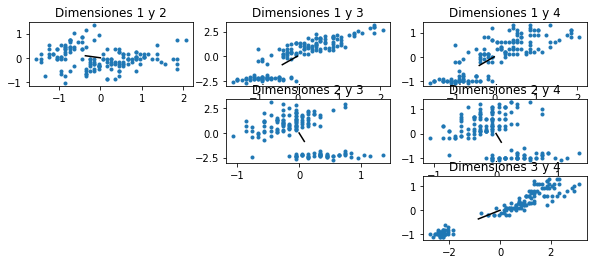

In [ ]:
# Primera componente principal
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(10,4))
plt.subplot(3,3,1), plt.plot(Xm[:,0],Xm[:,1],'.'), plt.title('Dimensiones 1 y 2')
plt.plot([0,evecs[0,0]],[0,evecs[1,0]],'k-')
plt.subplot(3,3,2), plt.plot(Xm[:,0],Xm[:,2],'.'), plt.title('Dimensiones 1 y 3')
plt.plot([0,evecs[0,0]],[0,evecs[2,0]],'k-')
plt.subplot(3,3,3), plt.plot(Xm[:,0],Xm[:,3],'.'), plt.title('Dimensiones 1 y 4')
plt.plot([0,evecs[0,0]],[0,evecs[3,0]],'k-')
plt.subplot(3,3,5), plt.plot(Xm[:,1],Xm[:,2],'.'), plt.title('Dimensiones 2 y 3')
plt.plot([0,evecs[1,0]],[0,evecs[2,0]],'k-')
plt.subplot(3,3,6), plt.plot(Xm[:,1],Xm[:,3],'.'), plt.title('Dimensiones 2 y 4')
plt.plot([0,evecs[1,0]],[0,evecs[3,0]],'k-')
plt.subplot(3,3,9), plt.plot(Xm[:,2],Xm[:,3],'.'), plt.title('Dimensiones 3 y 4')
plt.plot([0,evecs[2,0]],[0,evecs[3,0]],'k-')


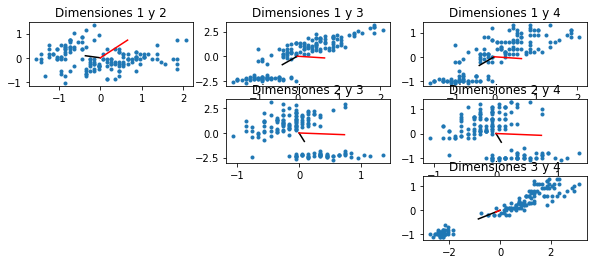

In [ ]:
# Primera componente principal
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(10,4))
plt.subplot(3,3,1), plt.plot(Xm[:,0],Xm[:,1],'.'), plt.title('Dimensiones 1 y 2')
plt.plot([0,evecs[0,0]],[0,evecs[1,0]],'k-')
plt.plot([0,evecs[0,1]],[0,evecs[1,1]],'r-')
plt.subplot(3,3,2), plt.plot(Xm[:,0],Xm[:,2],'.'), plt.title('Dimensiones 1 y 3')
plt.plot([0,evecs[0,0]],[0,evecs[2,0]],'k-')
plt.plot([0,evecs[0,1]],[0,evecs[2,1]],'r-')
plt.subplot(3,3,3), plt.plot(Xm[:,0],Xm[:,3],'.'), plt.title('Dimensiones 1 y 4')
plt.plot([0,evecs[0,0]],[0,evecs[3,0]],'k-')
plt.plot([0,evecs[0,1]],[0,evecs[3,1]],'r-')
plt.subplot(3,3,5), plt.plot(Xm[:,1],Xm[:,2],'.'), plt.title('Dimensiones 2 y 3')
plt.plot([0,evecs[1,0]],[0,evecs[2,0]],'k-')
plt.plot([0,evecs[1,1]],[0,evecs[2,1]],'r-')
plt.subplot(3,3,6), plt.plot(Xm[:,1],Xm[:,3],'.'), plt.title('Dimensiones 2 y 4')
plt.plot([0,evecs[1,0]],[0,evecs[3,0]],'k-')
plt.plot([0,evecs[1,1]],[0,evecs[3,1]],'r-')
plt.subplot(3,3,9), plt.plot(Xm[:,2],Xm[:,3],'.'), plt.title('Dimensiones 3 y 4')
plt.plot([0,evecs[2,0]],[0,evecs[3,0]],'k-')
plt.plot([0,evecs[2,1]],[0,evecs[3,1]],'r-')

#### Aplicamos los autovectores (rotamos los datos)

In [ ]:
Xpca = np.dot(evecs.T, Xm.T).T

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbac000f490>,
 Text(0.5, 1.0, 'Dimensiones 3 y 4'))

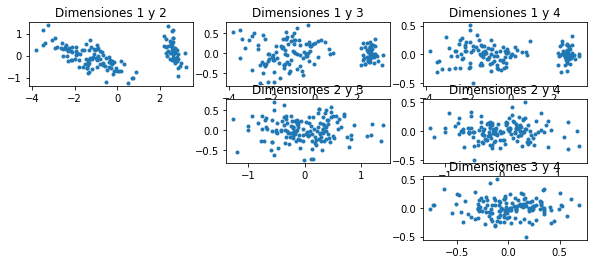

In [ ]:
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(10,4))
plt.subplot(3,3,1), plt.plot(Xpca[:,0],Xpca[:,1],'.'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,2), plt.plot(Xpca[:,0],Xpca[:,2],'.'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,3), plt.plot(Xpca[:,0],Xpca[:,3],'.'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,5), plt.plot(Xpca[:,1],Xpca[:,2],'.'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,6), plt.plot(Xpca[:,1],Xpca[:,3],'.'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,9), plt.plot(Xpca[:,2],Xpca[:,3],'.'), plt.title('Dimensiones 3 y 4')

In [ ]:
cov_pca = np.dot(Xpca.T, Xpca) / Xpca.shape[0]


In [ ]:
#Esta es la matriz de covarianza de los datos despuéés de aplicar el PCA
cov_pca

array([[ 4.20005343e+00, -1.17339873e-17,  2.25070527e-16,
        -3.28190182e-16],
       [-1.17339873e-17,  2.41052943e-01,  4.90266665e-17,
        -4.78018538e-16],
       [ 2.25070527e-16,  4.90266665e-17,  7.76881034e-02,
        -1.43454048e-16],
       [-3.28190182e-16, -4.78018538e-16, -1.43454048e-16,
         2.36761924e-02]])

## 1. PCA usando sklearn


https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn import decomposition

In [ ]:
model_pca = decomposition.PCA(n_components=4)

In [ ]:
model_pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
Xpca = model_pca.transform(X)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbac0442e10>,
 Text(0.5, 1.0, 'Dimensiones 3 y 4'))

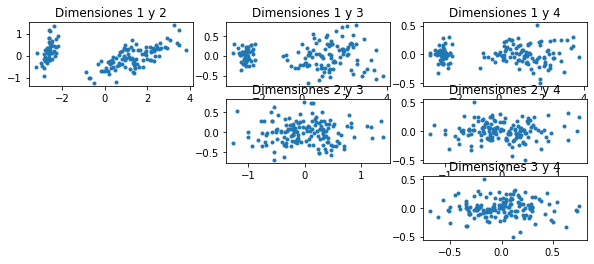

In [ ]:
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(10,4))
plt.subplot(3,3,1), plt.plot(Xpca[:,0],Xpca[:,1],'.'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,2), plt.plot(Xpca[:,0],Xpca[:,2],'.'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,3), plt.plot(Xpca[:,0],Xpca[:,3],'.'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,5), plt.plot(Xpca[:,1],Xpca[:,2],'.'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,6), plt.plot(Xpca[:,1],Xpca[:,3],'.'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,9), plt.plot(Xpca[:,2],Xpca[:,3],'.'), plt.title('Dimensiones 3 y 4')

## EJERCICIOS

#### Ejercicio 1: 
Resume lo mas que puedas en una celda los pasos imprescindibles para aplicar PCA "a mano". Comenta cada linea.

Como siempre se inicia descargando los datos, en nuestro caso anteriormente los datasets de sklearn. Miramos cual es su dimensión para así saber cuales son sus valores de entrada y poder aplicar una reducción de dimensión. Entonces lo primero que vamos a hacer después de realizar todo esto es visualizar en el espacio estas variables de entrada que tenemos en el conjunto de datos para ver la relación que tienen una variable con la otra. 

Ahora ya podemos empezar a aplicar la PCA "a mano" sin utilizar ningún software que nos lo haga ya directamente.

**Primer paso:** centrar los datos con los que estamos trabajando, es decir, quitarles la media.

**Segundo paso:** Estimar la covarianza que existen entre las variables que estamos trabajando. 

**Tercer paso:** Obtener los autovalores y autovectores de la matriz de covarianza.

**Cuarto paso:** Aplicamos propiemante dicha la PCA, cogiendo los autovectores y multiplicandolo por la matriz de datos.


#### Ejercicio 2: 
Aplica PCA "a mano" a los datos de Boston. Explica cada paso.

In [ ]:
Boston = datasets.load_boston()
X = Boston.data

X.shape

# PRIMER PASO
# Nosotros asumimos que la matrix de datos está organizada de tal forma que las filas tenemos los diferentes ejemplos 
# y en las columnas tenemos las variables.


# Por eso al hacer la media tenemos que decirle que axis = 0, es decir que haga la media por filas.

m = np.mean(X, axis = 0) 

# Por lo tanto la media va a ser un valor que tenga cuatro componenetes y cada uno de esos cuatro componenetes 
# corresponden a la media de cada una de las variables del vector.

# Luego restamos las medias

Xm = X - m[np.newaxis,:]

# Esta es la media

print("Esta es la media: ",m)

# Teniendo aqui todos los datos centrados, podríamos mostrarlo gráficamente  y veríamos que este no cambiaría nada 
#pero en este caso no lo voy a hacer.

# SEGUNDO PASO, para hacer esa estimación de la covarianza necesitamos simplemente que hacer la matriz de datos 
# traspuesta por ella misma dandonos así una matriz de dimensión 13x13. En cada una de los componenetes de esa 
# matriz, en la diagonal vamos aencontrar 1 porque la covarianza que tiene cada una consigo misma es máxima y 
# luego en cada uno de los elementos de la diagonal tenemos cual es la covarianza que existe entre cada par de 
# variables.

cov_matrix = np.dot(Xm.T, Xm) / Xm.shape[0] # Todo esto lo dividimos por el número de datos.

# Esta es la matriz de covarianza

print("Esta es la matriz de covarianza: ", cov_matrix)

# TERCER PASO, lo que nos va a dar es un espacio donde cada uno de esos vectores pues va a atener max. varianza.
# Esto lo hacemos mediante eig o la que hemos utilizado eigh, las dos hacen lo mismo pero esta última es un poco 
# más precisa.

evals, evecs = np.linalg.eigh(cov_matrix)

# Autovectores

print("Estos son los autovectores: ", evecs)

# Autovalores, estos estan ordenados de menor valor a mayor valor. Los de mayor valor serían los que están asociados 
# con los autovectores que están apuntando hacia la dirección del máximo desplazamiento.

print("Estos son los autovalores: ", evals)

# Ordenamos los autovectores de mayor a menor autovalor porque el de mayor valor es el que en principio más nos 
# interesa y es el que más información tiene.

idx = np.argsort(-evals)

evecs = evecs[:,idx] # Aplicamos a los autovectores los indices 

# CUARTO PASO: Aplicamos los autovectores (rotamos los datos)
# Tenemos que hacer la traspuesta de ambas matrices para que se pueda hacer el producto matricial correctamente.

Xpca = np.dot(evecs.T, Xm.T).T 

# Esta es la matriz de covarianza de los datos después de aplicar el PCA, para ver cuál es la covarianza de las 
# señales una vez los hemos rotado usando la PCA.

cov_pca = np.dot(Xpca.T, Xpca) / Xpca.shape[0]
print("Esta es la matriz de covarianza después de aplicar la PCA: ", cov_pca)


Esta es la media:  [3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01]
Esta es la matriz de covarianza:  [[ 7.38403597e+01 -4.01364779e+01  2.39449231e+01 -1.21867321e-01
   4.18764657e-01 -1.32241920e+00  8.52365371e+01 -6.86313118e+00
   4.67551765e+01  8.43151930e+02  5.38866018e+00 -3.01784224e+02
   2.79308592e+01]
 [-4.01364779e+01  5.42861840e+02 -8.52438484e+01 -2.52425440e-01
  -1.39338901e+00  5.10240963e+00 -3.73162612e+02  3.25648193e+01
  -6.32234998e+01 -1.23401015e+03 -1.97374865e+01  3.72982822e+02
  -6.86471020e+01]
 [ 2.39449231e+01 -8.52438484e+01  4.69714297e+01  1.09452069e-01
   6.05873943e-01 -1.88422543e+00  1.24267828e+02 -1.02078838e+01
   3.54797145e+01  8.31713333e+02  5.68085478e+00 -2.23137898e+02
   2.95218113e+01]
 [-1.21867321e-01 -2.52425440e-01  1.09452069e-01  6.43854770e-02
   2.67899788e-03  1.62525621e

#### Ejercicio 3: 
Aplica PCA usando sklearn a los datos de Boston. Explica cada paso.

In [ ]:
# En este caso, el sklearn lo tiene todo implementado, importamos decomposition
from sklearn import decomposition

# Volvemos a cargar los datos para ver que los tengamos a mano 

Boston = datasets.load_boston()
X = Boston.data

# Dentro de decomposition tenemos la PCA a la cual hay que idicarle cuantos n_components vamos a querer, en este caso
# nos quedaremos con 13, igual que antes.

model_pca = decomposition.PCA(n_components=13)

model_pca.fit(X) # Internamente calcula la matriz de covarianza.

Xpca = model_pca.transform(X) # El transform multiplica los datos por los autovectores.

# Si hicieramos un gráfico nos trendría que salir idéntico al anterior

#### Ejercicio 4: 
¿Que otras descomposiciones hay en "sklearn.decomposition" que conozcas?
Elige una, pruébala y explícala.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition


In [ ]:
from sklearn import decomposition

# Volvemos a cargar los datos para ver que los tengamos a mano 
Boston = datasets.load_boston()
X = Boston.data

# Dentro de decomposition tenemos la PCA a la cual hay que idicarle cuantos n_components vamos a querer, en este caso 
# nos quedaremos con 13, igual que antes.

model_pca = decomposition.NMF(n_components=13)
model_pca.fit(X)
Xpca = model_pca.transform(X)

# Factorización de matriz no negativa (NMF)
# Encuentra dos matrices no negativas (W, H) cuyo producto se aproxime a la matriz no negativa X. Esta factorización 
# se puede utilizar, por ejemplo, para la reducción de dimensionalidad, la separación de fuentes o la extracción de 
# temas.